## Part II - (Loan Data From Prosper)
#### by (Emmanuel Favour)


### Preliminary Wrangling

from the 81 columns provided in the dataset, i choosed the data set i would focus on into a dataframe and this columns  includes;

* ListingKey: Unique key for each listing, same value as the 'key' used in the listing object in the API.
* Term: The length of the loan expressed in months.
* LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
* BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
* BorrowerRate: The Borrower's interest rate for this loan.
* ProsperRating(Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.

* BorrowerState:The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
* Occupation: The Occupation selected by the Borrower at the time they created the listing.
* EmploymentStatus:The employment status of the borrower at the time they posted the listing.
* IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
* IncomeRange: The income range of the borrower at the time the listing was created.
* LoanOriginalAmount: The origination amount of the loan.
* LoanOriginationDate: The date the loan was originated.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings("ignore")# to ingore some filter warnings especially from the seaborn library
%matplotlib inline

In [3]:
loan_dt_clean = pd.read_csv('loan_dt_cleaned')


### Visualization(1)

#### Which of the loan status is most Dominant.
* Current and Completed are the most dominant.  
* 10.2% of the entire loan has been charged off as bad debt.

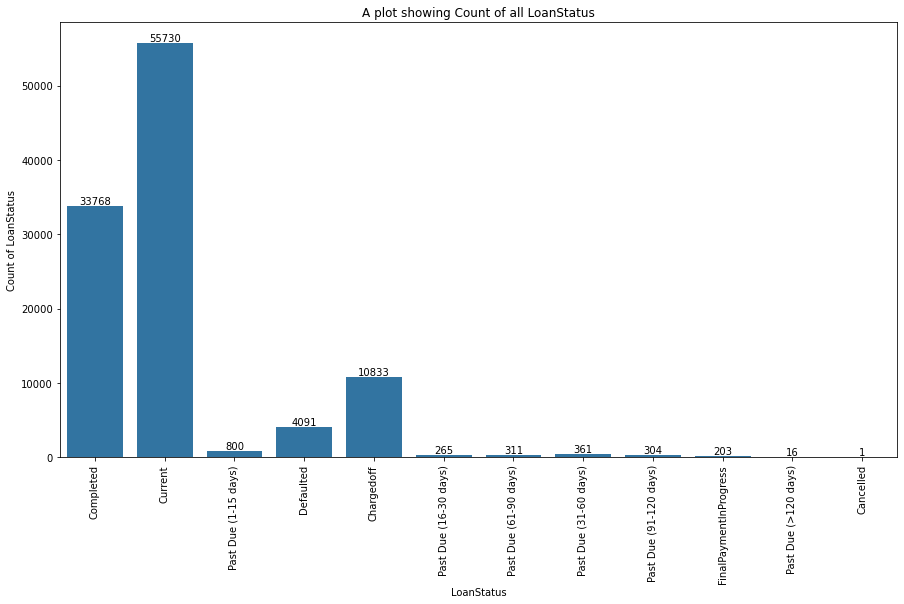

In [4]:
# Creating a bar chart to show count on loanstatus
#Increasing the plot size.
plt.figure(figsize=(15,8))
base_color = sns.color_palette()[0]
ax = sns.countplot(data = loan_dt_clean, x = 'LoanStatus', color = base_color)
plt.xticks(rotation=90)
# iterate through the axes containers
for i in ax.containers:
     ax.bar_label(i,)
        
plt.title('A plot showing Count of all LoanStatus')
plt.xlabel('LoanStatus')
plt.ylabel('Count of LoanStatus');
# Percentage charged off as bad debt.       
# status = loan_dt_clean['LoanStatus'].count()
# gain = 10833/status * 100
# gain = 10.154382610162818

### Visualization(2)

#### What is the correlation between LoanOriginalAmount and BorrowerAPR
* This plot shows a negative correlation between the borrowerAPR and LoanOriginalAmount the  the range of borrowerAPR decrease with the increase of LoanOriginalAmount.

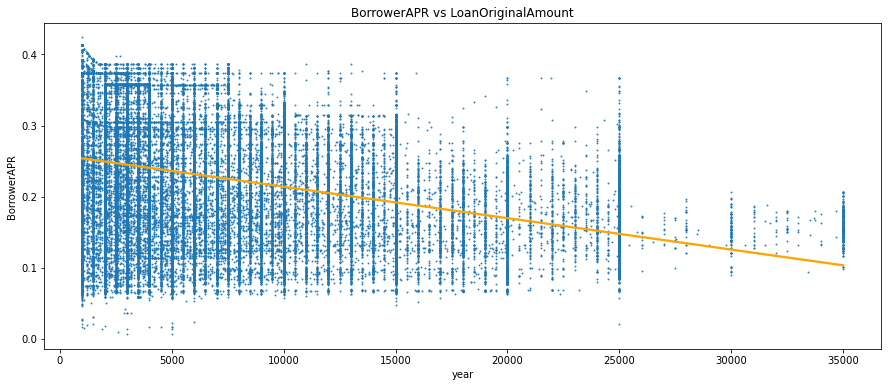

In [5]:
#Using the regplot function to create a scatter plot showing correlation between LoanOriginalAmount and BorrowerAPR
plt.figure(figsize = [15, 6])
sns.regplot(data = loan_dt_clean, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'s':1}, line_kws={'color':'Orange'})
plt.title('BorrowerAPR vs LoanOriginalAmount')
plt.xlabel('year')
plt.ylabel('BorrowerAPR');    

### Visualization(3)

#### Does the Employment Status affect the Amount of Loan Taken ?
* It can be seen from the pointplot  that the borrowers who are Employed, haves Loans of Higher Amounts when compared to borrowers with other categories of employment.
* Also borrowers who are Retired & Not Employed, have taken loans of Lower Amounts when compared with other Employment categories.

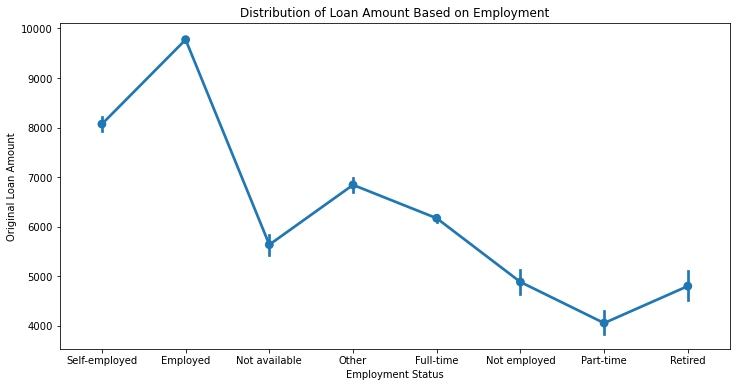

In [6]:
#Using the pointplot() to show how Does the Employment Status affect the Amount of Loan Taken.
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='LoanOriginalAmount', x='EmploymentStatus', data=loan_dt_clean)
plt.title('Distribution of Loan Amount Based on Employment')
plt.xlabel('Employment Status')
plt.ylabel('Original Loan Amount')
plt.show()


### Visualization(4)

#### Does the term have a significance effect on the LoanAmount_range and BorrowerAPR
* The barplots shows that the longer term(60 months) had higher borrowerAPR. which means the longer the term the individual collect the loan the more likely the BorrowerAPR increases.

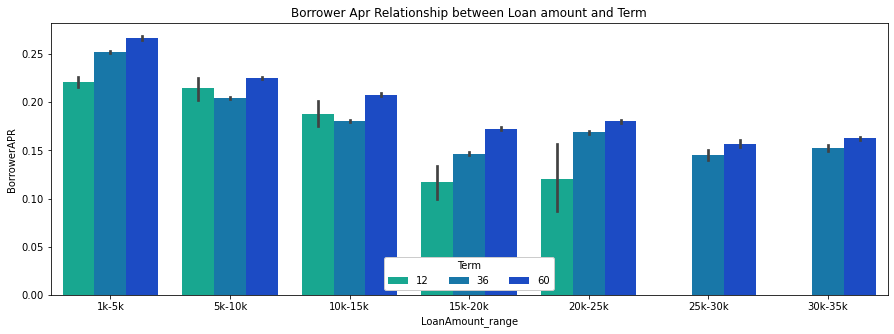

In [9]:
# creating a bar plot for the distribution
loan_dt_clean['LoanAmount_range']=pd.cut(loan_dt_clean.LoanOriginalAmount,bins=[1000,5000,10000,15000,20000,25000,30000,35000],labels=['1k-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
plt.figure(figsize = [15, 5])
Axi = sns.barplot(data=loan_dt_clean, x='LoanAmount_range', y='BorrowerAPR', hue='Term', palette="winter_r")
Axi.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Term')
plt.title("Borrower Apr Relationship between Loan amount and Term");

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt